<div class="alert alert-danger" role="alert">
<h1 align="center"><font size = 14>Color-Detection</font></h1>
<h4 align="center">September, 10_2024<h4>
<h3 align="center">Armin Amani</h3>

<div class="alert alert-danger" role="alert">
📤 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import time
import os
import cv2 as cv

import tensorflow as tf

<div class="alert alert-danger" role="alert"> 
💾 Read Data

In [2]:
train = "/content/drive/MyDrive/train"
val = "/content/drive/MyDrive/val"
test = "/content/drive/MyDrive/test"

In [5]:
def show_data(dataset):

  counts = []

  subdirectory = sorted(os.listdir(dataset))
  for subset in subdirectory:
    file_path = os.path.join(dataset, subset)

    if os.path.isdir(file_path):
      num_file = len(os.listdir(file_path))
      counts.append(num_file)
    else:
      counts.append(0)

  df = pd.DataFrame({'label': subdirectory, 'count':counts})

  return df

In [6]:
df = show_data(train)
df

,label,count
0,beige,390
1,black,405
2,blue,737
3,brown,543
4,gold,193
5,green,551
6,grey,419
7,orange,517
8,pink,479
9,purple,530


In [7]:
class_subset_train = sorted(os.listdir(train))
class_subset_train

['beige',
 'black',
 'blue',
 'brown',
 'gold',
 'green',
 'grey',
 'orange',
 'pink',
 'purple',
 'red',
 'silver',
 'tan',
 'white',
 'yellow']

<div class="alert alert-danger" role="alert"> 
🔎 ResNet50 model

In [9]:
isize = 64

In [11]:
base_model = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet',input_shape=(isize, isize, 3), pooling='max')
x = base_model.output
x = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(rate=.5, seed=123)(x)
output = tf.keras.layers.Dense(len(class_subset_train), activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
model.compile(tf.keras.optimizers.Adamax(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 64, 64, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 70, 70, 3)      │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 32, 32, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 32, 32, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 32, 32, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 34, 34, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 16, 16, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 16, 16, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 16, 16, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 16, 16, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 16, 16, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,125,327 (92.03 MB)

 Trainable params: 24,067,599 (91.81 MB)

 Non-trainable params: 57,728 (225.50 KB)

<div class="alert alert-danger" role="alert"> 
🔎 generate train, validation and test datas

In [13]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    brightness_range=None,
    width_shift_range=0.5,
    rotation_range=False,
    horizontal_flip=True,
    vertical_flip=False
)

valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

In [14]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [15]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [22]:
def dataframe_keras(sourcedir):

    coll_labelnames = []
    coll_idfiles = []

    for label in os.listdir(sourcedir):
        label_dir = os.path.join(sourcedir, label)
        if os.path.isdir(label_dir):  # Ensure it's a directory
            idfiles = os.listdir(label_dir)
            labelnames = len(idfiles) * [label]

            coll_labelnames.append(labelnames)
            coll_idfiles.append([os.path.join(label, file) for file in idfiles])

    df = pd.DataFrame({'label': flatten(coll_labelnames), 'idfiles': flatten(coll_idfiles)})
    df['id'] = sourcedir + '/' + df['idfiles']


    return df

In [23]:
# Create DataFrames for train and validation datasets
traindf = dataframe_keras(train)
validdf = dataframe_keras(val)

In [24]:
traindf

,label,idfiles,id
0,red,red/279ee8ae8e.jpg,/content/drive/MyDrive/train/red/279ee8ae8e.jpg
1,red,red/230c7d3491.jpg,/content/drive/MyDrive/train/red/230c7d3491.jpg
2,red,red/30c3e3f915.jpg,/content/drive/MyDrive/train/red/30c3e3f915.jpg
3,red,red/0e929281f7.jpg,/content/drive/MyDrive/train/red/0e929281f7.jpg
4,red,red/3b1702c51a.jpg,/content/drive/MyDrive/train/red/3b1702c51a.jpg
...,...,...,...
7086,black,black/b268f9e079.jpg,/content/drive/MyDrive/train/black/b268f9e079.jpg
7087,black,black/cc3d245f1c.jpg,/content/drive/MyDrive/train/black/cc3d245f1c.jpg
7088,black,black/acda5d9262.jpg,/content/drive/MyDrive/train/black/acda5d9262.jpg
7089,black,black/cfae6a4222.jpg,/content/drive/MyDrive/train/black/cfae6a4222.jpg


In [25]:
validdf

,label,idfiles,id
0,silver,silver/353fe50dc2.jpg,/content/drive/MyDrive/val/silver/353fe50dc2.jpg
1,silver,silver/766cc9ce09.jpg,/content/drive/MyDrive/val/silver/766cc9ce09.jpg
2,silver,silver/ff8ddcd3bc.jpg,/content/drive/MyDrive/val/silver/ff8ddcd3bc.jpg
3,silver,silver/aca2a18d30.jpg,/content/drive/MyDrive/val/silver/aca2a18d30.jpg
4,silver,silver/eb7c8c4fb5.jpg,/content/drive/MyDrive/val/silver/eb7c8c4fb5.jpg
...,...,...,...
1485,gold,gold/353630f86d.jpg,/content/drive/MyDrive/val/gold/353630f86d.jpg
1486,gold,gold/45a01ac896.jpg,/content/drive/MyDrive/val/gold/45a01ac896.jpg
1487,gold,gold/e45ede929e.jpg,/content/drive/MyDrive/val/gold/e45ede929e.jpg
1488,gold,gold/a783cd34f1.jpg,/content/drive/MyDrive/val/gold/a783cd34f1.jpg


<div class="alert alert-danger" role="alert"> 
🔎 train and validation generatore data for train the model

In [26]:
BATCH_SIZE = 32

In [27]:
traingen=train_generator.flow_from_dataframe(
    dataframe=traindf,
    directory=None,
    x_col="id",
    y_col="label",
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode="categorical",
    target_size=(isize, isize))

validgen=valid_generator.flow_from_dataframe(
    dataframe=validdf,
    directory=None,
    x_col="id",
    y_col="label",
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode="categorical",
    target_size=(isize, isize))

Found 7091 validated image filenames belonging to 15 classes.
Found 1490 validated image filenames belonging to 15 classes.


<div class="alert alert-danger" role="alert"> 
🔎 train the model

In [30]:
t1 = time.time()/60

steps_per_epoch = traingen.samples // BATCH_SIZE
val_steps = validgen.samples // BATCH_SIZE
n_epochs = 50

csv_logger = tf.keras.callbacks.CSVLogger('training.log', separator=',', append=False)

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='ResNet50-model.best.keras',
                               verbose=1,
                               save_best_only=True)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

history = model.fit(traingen,
                    epochs=n_epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validgen,
                    validation_steps=val_steps,
                    callbacks=[early_stop, checkpointer, csv_logger],
                    verbose=True,
                    shuffle = True,)

t2 = time.time()/60
print("Duration:", t2-t1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.1578 - loss: 2.9436
Epoch 1: val_loss improved from inf to 38.64033, saving model to ResNet50-model.best.keras
221/221 ━━━━━━━━━━━━━━━━━━━━ 1966s 8s/step - accuracy: 0.1582 - loss: 2.9419 - val_accuracy: 0.0754 - val_loss: 38.6403
Epoch 2/50
  1/221 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.3438 - loss: 2.1453

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 38.64033
221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3438 - loss: 2.1453 - val_accuracy: 0.0556 - val_loss: 39.6772
Epoch 3/50
220/221 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.4607 - loss: 1.7355
Epoch 3: val_loss improved from 38.64033 to 28.30209, saving model to ResNet50-model.best.keras
221/221 ━━━━━━━━━━━━━━━━━━━━ 63s 270ms/step - accuracy: 0.4610 - loss: 1.7344 - val_accuracy: 0.0761 - val_loss: 28.3021
Epoch 4/50
  1/221 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.6875 - loss: 1.0293
Epoch 4: val_loss did not improve from 28.30209
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.6875 - loss: 1.0293 - val_accuracy: 0.0556 - val_loss: 40.6822
Epoch 5/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.6037 - loss: 1.2585
Epoch 5: val_loss improved from 28.30209 to 2.82440, saving model to ResNet50-model.best.keras
221/221 ━━━━━━━━━━━━━━━━━━━━ 83s 277ms/step - accuracy: 0.6038 - loss: 1.2583 - val_accu

<div class="alert alert-danger" role="alert"> 
🔎 save the model

In [31]:
model.save_weights("ResModel_weights.weights.h5")

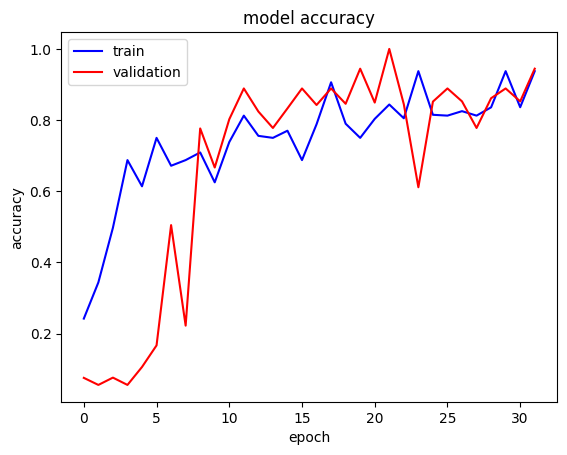

In [32]:
plt.plot(history.history['accuracy'], color='b', label='training accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

<div class="alert alert-danger" role="alert"> 
🔎 generate test datas for testing the model

In [33]:
class_subset_test = sorted(os.listdir(test))
class_subset_test

['beige',
 'black',
 'blue',
 'brown',
 'gold',
 'green',
 'grey',
 'orange',
 'pink',
 'purple',
 'red',
 'silver',
 'tan',
 'white',
 'yellow']

In [34]:
testgen = test_generator.flow_from_directory(  test,
                                               target_size=(isize, isize),
                                               batch_size=1,
                                               class_mode=None,
                                               classes=class_subset_test,
                                               shuffle=False
                                               )

Found 1511 images belonging to 15 classes.


<div class="alert alert-danger" role="alert"> 
🔎 predict model on test datas

In [35]:
predict = model.predict(testgen)
predict

1511/1511 ━━━━━━━━━━━━━━━━━━━━ 328s 214ms/step


array([[1.6011564e-01, 1.1606135e-03, 1.9608557e-03, ..., 4.1352513e-01,
        4.7964379e-03, 2.3989896e-03],
       [3.7211022e-01, 2.5142616e-04, 4.3993947e-04, ..., 5.9562367e-01,
        1.5126158e-03, 6.0486718e-04],
       [3.9969996e-01, 1.9490439e-04, 1.2434684e-04, ..., 5.7884651e-01,
        6.2556989e-03, 6.4081966e-04],
       ...,
       [3.3038834e-04, 8.2849139e-05, 5.8733043e-04, ..., 9.6452946e-04,
        1.8670449e-04, 9.2165077e-01],
       [2.0754982e-04, 3.7633326e-05, 1.5683028e-05, ..., 1.4166563e-04,
        4.6733732e-04, 9.5767605e-01],
       [5.2416063e-04, 8.2280763e-05, 1.6025973e-04, ..., 4.8606686e-04,
        4.3470860e-03, 9.8335302e-01]], dtype=float32)

In [37]:
df_testprediction = pd.DataFrame(predict, index=testgen.filenames, columns=class_subset_test)

In [38]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df_testprediction

,beige,black,blue,brown,gold,green,grey,orange,pink,purple,red,silver,tan,white,yellow
beige/02e37c0e56.jpg,0.1601,0.0012,0.0020,0.1265,0.0048,0.0057,0.2111,0.0052,0.0050,0.0018,0.0019,0.0540,0.4135,0.0048,0.0024
beige/0b01008bee.jpg,0.3721,0.0003,0.0004,0.0124,0.0072,0.0010,0.0031,0.0009,0.0010,0.0019,0.0003,0.0017,0.5956,0.0015,0.0006
beige/0c3bb456ee.jpg,0.3997,0.0002,0.0001,0.0005,0.0028,0.0002,0.0012,0.0003,0.0006,0.0005,0.0004,0.0077,0.5788,0.0063,0.0006
beige/148b514638.jpg,0.3748,0.0004,0.0008,0.0018,0.0035,0.0004,0.0072,0.0005,0.0035,0.0004,0.0008,0.0186,0.5739,0.0119,0.0017
beige/1a1296c730.jpg,0.4723,0.0020,0.0030,0.0325,0.0909,0.0030,0.0623,0.0032,0.0040,0.0052,0.0009,0.0188,0.2920,0.0041,0.0058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yellow/fd1da2f797.jpg,0.0025,0.0003,0.0006,0.0023,0.1447,0.0009,0.0008,0.0406,0.0012,0.0005,0.0005,0.0004,0.0019,0.0007,0.8020
yellow/fd3d2525fb.jpg,0.0024,0.0000,0.0000,0.0000,0.0008,0.0082,0.0001,0.0006,0.0003,0.0001,0.0001,0.0001,0.0004,0.0028,0.9840
yellow/feacf53e9e.jpg,0.0003,0.0001,0.0006,0.0002,0.0172,0.0566,0.0000,0.0012,0.0002,0.0002,0.0001,0.0004,0.0010,0.0002,0.9217
yellow/feeded3e6e.jpg,0.0002,0.0000,0.0000,0.0002,0.0397,0.0009,0.0001,0.0003,0.0000,0.0000,0.0001,0.0001,0.0001,0.0005,0.9577


In [39]:
predicted_classes = np.argmax(model.predict(testgen), axis=-1)
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
true_classes = testgen.classes

1511/1511 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step


<div class="alert alert-danger" role="alert"> 
🔎 precision_recall_fscore_support

In [40]:
from sklearn import metrics

In [41]:
def display_results(y_true, y_preds, class_labels):

    results = pd.DataFrame(metrics.precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T

    results.rename(columns={0: 'Precision', 1: 'Recall',
                            2: 'F-Score', 3: 'Support'}, inplace=True)

    results.sort_values(by='F-Score', ascending=False, inplace=True)
    global_acc = metrics.accuracy_score(y_true, y_preds)

    print("Overall Categorical Accuracy: {:.2f}%".format(global_acc*100))
    return results

<div class="alert alert-danger" role="alert"> 
🔎 plot_predictions

In [45]:
def plot_predictions(y_true, y_preds, test_generator, class_indices):

    fig = plt.figure(figsize=(20, 10))
    for i, idx in enumerate(np.random.choice(test_generator.samples, size=40, replace=False)):
        ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(test_generator[idx]))
        pred_idx = y_preds[idx]
        true_idx = y_true[idx]

        plt.tight_layout()
        ax.set_title("{}\n({})".format(class_indices[pred_idx], class_indices[true_idx]), color=("green" if pred_idx == true_idx else "red"))
    fig.savefig('testgallery.png')

In [43]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 83.32%


,Precision,Recall,F-Score,Support
green,0.9746,0.9829,0.9787,117.0000
blue,0.9500,0.9560,0.9530,159.0000
yellow,0.9580,0.9421,0.9500,121.0000
purple,0.9720,0.9043,0.9369,115.0000
red,0.8452,0.9776,0.9066,134.0000
pink,0.9375,0.8738,0.9045,103.0000
orange,0.8991,0.8750,0.8869,112.0000
white,0.8387,0.9176,0.8764,85.0000
black,0.8043,0.8605,0.8315,86.0000
brown,0.8302,0.7928,0.8111,111.0000


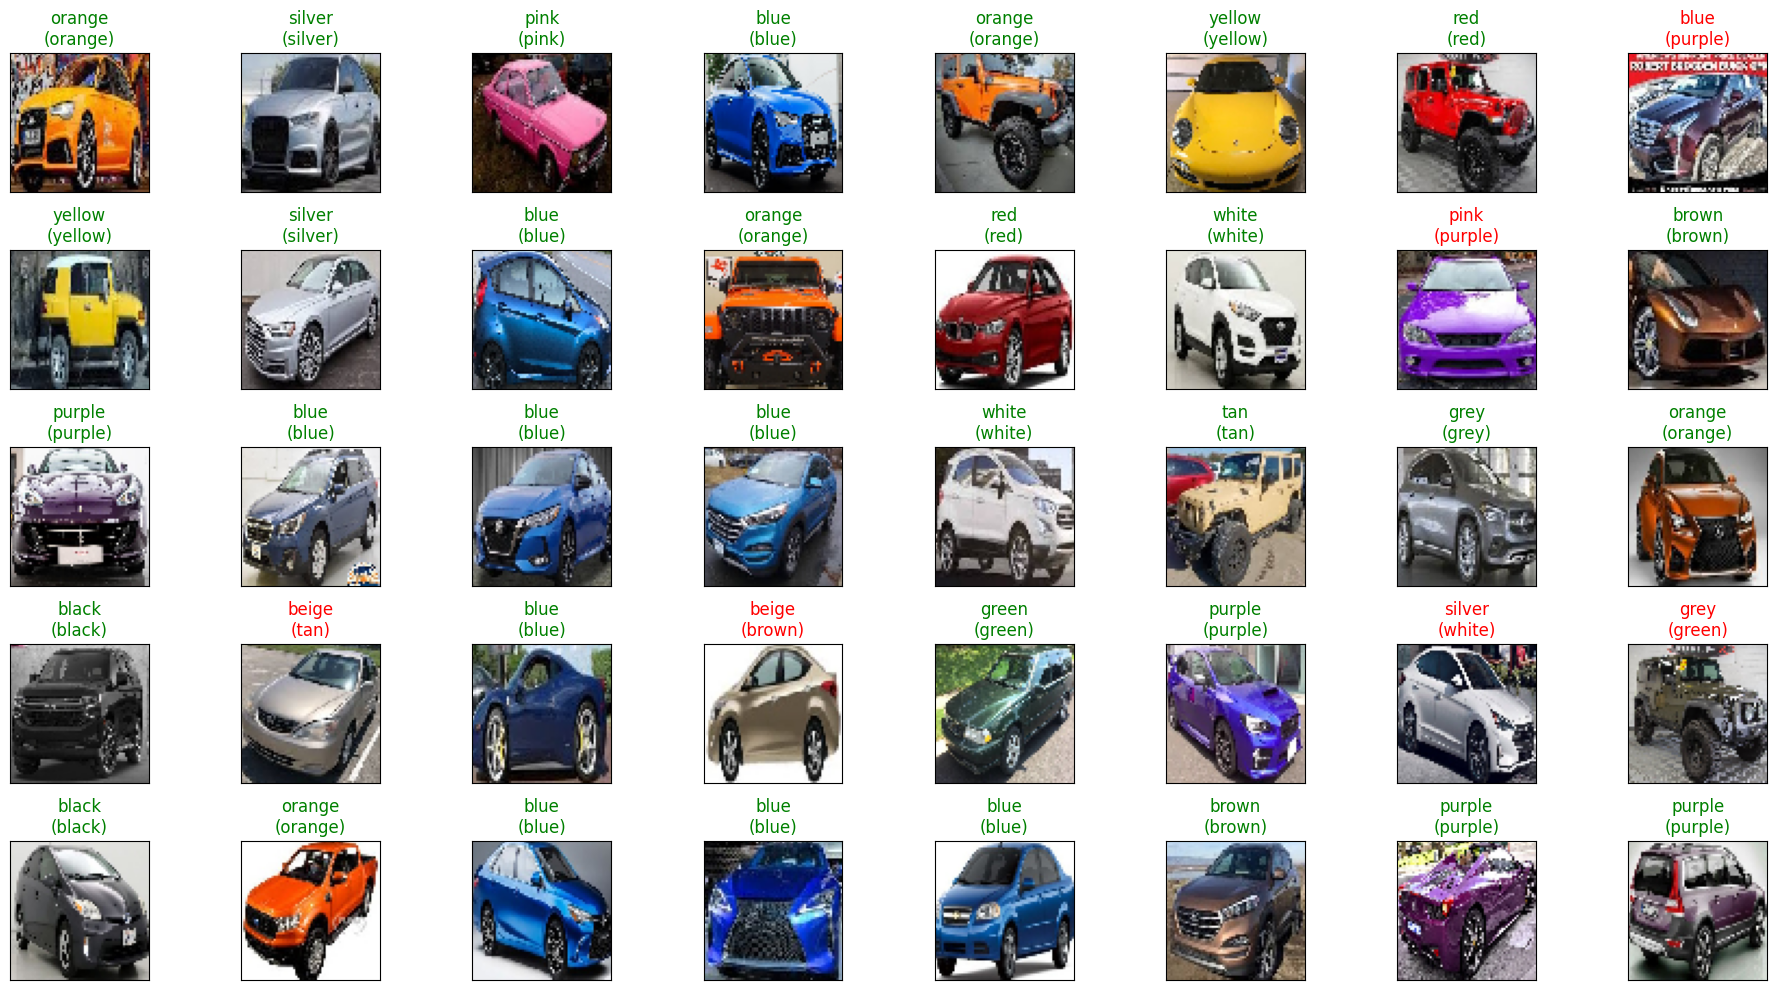

In [46]:
plot_predictions(true_classes, predicted_classes, testgen, class_indices)

In [ ]:
# Armin Amani